# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [502]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

In [503]:
df = df.drop(columns=['WaterworksName'])
df

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,AverageFilterBedVolume,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,15.217089,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,28.970630,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,NaN,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,60.686602,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,19.339643,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,25.079249,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


In [504]:
missing_data = df.isna().sum() / len(df) * 100
missing_data_percentage = missing_data.sort_values(ascending=False)
missing_data_percentage

UniformityCoefficient        64.556962
TotalEBCT                    49.367089
SumOfld_layer                49.367089
OverallFilterGrainSizeMin    43.037975
AverageFilterBedVolume       43.037975
OverallFilterGrainSizeMax    43.037975
AverageTotalFilterDepth      41.772152
TankExploitation             37.974684
HLR_BW                       34.177215
Stage1HLR                    26.582278
FilterExploitation           20.253165
MaxTypicalFlow               20.253165
BW%                          16.455696
AverageBackwashVolume        12.658228
UFRV                          8.860759
TankCapacity                  5.063291
Footprint                     5.063291
AverageFilterArea             5.063291
AverageTypicalRunVolume       2.531646
TotalFilters                  0.000000
PrimaryTrigger                0.000000
OxygenFactor                  0.000000
AerationType                  0.000000
GravityPressureMixed          0.000000
Stages                        0.000000
AbstractedVolume         

In [505]:
columns_to_drop = missing_data_percentage[missing_data_percentage > 40].index
df = df.drop(columns=columns_to_drop)
df

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,6,50.00,6.000000,5200.00000,10.00,Time,57.886530,Cascade,1.880000,1.388889,143.341204,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,4,110.00,4.908739,300.00000,28.00,Volume,63.521586,Air injection,1.620000,11.204508,16.714412,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,4,120.00,15.343900,3800.00000,83.30,Volume,64.908486,Bottom aeration,2.213333,3.935020,44.693822,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,Cascade,2.073333,NaN,194.588021,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,2,NaN,1.495000,250.00000,4.50,Volume,NaN,Cascade,1.313333,NaN,412.300024,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,Mix,91.698648,Cascade,1.546667,5.242647,24.106636,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,20,1407.29,10.178760,4500.00000,57.00,Volume,89.405620,Passive plate aerator,2.133333,6.912876,22.050800,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,6,250.00,14.752500,2331.50137,51.57,Time,19.331598,Bottom aeration,1.673333,2.824380,209.076387,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,Cascade,2.200000,NaN,152.513970,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


In [506]:
#using one-hot encoding to transform the 'PrimaryTrigger'
columns = ["PrimaryTrigger"]
df = pd.get_dummies(df, columns=columns, prefix=[col.replace(' ', '') for col in columns])
df

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,...,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume,PrimaryTrigger_Mix,PrimaryTrigger_Time,PrimaryTrigger_Volume,PrimaryTrigger_Waterlevel above filter
0,6,50.00,6.000000,5200.00000,10.00,57.886530,Cascade,1.880000,1.388889,143.341204,...,NaN,27.294778,NaN,Gravity,Single,253543,False,True,False,False
1,4,110.00,4.908739,300.00000,28.00,63.521586,Air injection,1.620000,11.204508,16.714412,...,30.557749,2.576075,NaN,Pressure,Double,612094,False,False,True,False
2,4,120.00,15.343900,3800.00000,83.30,64.908486,Bottom aeration,2.213333,3.935020,44.693822,...,32.791831,21.825600,NaN,Gravity,Double,682318,False,False,True,False
3,2,NaN,16.000000,1200.00000,26.00,NaN,Cascade,2.073333,NaN,194.588021,...,NaN,12.554300,NaN,Gravity,Single,156998,False,False,True,False
4,2,NaN,1.495000,250.00000,4.50,NaN,Cascade,1.313333,NaN,412.300024,...,NaN,52.220566,NaN,Gravity,Single,6710,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,91.698648,Cascade,1.546667,5.242647,24.106636,...,NaN,9.176959,39.682540,Gravity,Double,11454775,True,False,False,False
75,20,1407.29,10.178760,4500.00000,57.00,89.405620,Passive plate aerator,2.133333,6.912876,22.050800,...,51.086775,6.040393,NaN,Pressure,Single,11021800,False,False,True,False
76,6,250.00,14.752500,2331.50137,51.57,19.331598,Bottom aeration,1.673333,2.824380,209.076387,...,30.367735,22.367525,45.833333,Gravity,Single,423362,False,True,False,False
77,12,NaN,37.437401,4400.00000,134.00,NaN,Cascade,2.200000,NaN,152.513970,...,32.053507,NaN,NaN,Gravity,Double,1521895,False,False,True,False


In [507]:
columns_to_encode = ["AerationType", "Stages", "GravityPressureMixed"]
label = LabelEncoder()
for col in columns_to_encode:
    df[col] = label.fit_transform(df[col])
df

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,...,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume,PrimaryTrigger_Mix,PrimaryTrigger_Time,PrimaryTrigger_Volume,PrimaryTrigger_Waterlevel above filter
0,6,50.00,6.000000,5200.00000,10.00,57.886530,2,1.880000,1.388889,143.341204,...,NaN,27.294778,NaN,0,2,253543,False,True,False,False
1,4,110.00,4.908739,300.00000,28.00,63.521586,0,1.620000,11.204508,16.714412,...,30.557749,2.576075,NaN,2,0,612094,False,False,True,False
2,4,120.00,15.343900,3800.00000,83.30,64.908486,1,2.213333,3.935020,44.693822,...,32.791831,21.825600,NaN,0,0,682318,False,False,True,False
3,2,NaN,16.000000,1200.00000,26.00,NaN,2,2.073333,NaN,194.588021,...,NaN,12.554300,NaN,0,2,156998,False,False,True,False
4,2,NaN,1.495000,250.00000,4.50,NaN,2,1.313333,NaN,412.300024,...,NaN,52.220566,NaN,0,2,6710,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,91.698648,2,1.546667,5.242647,24.106636,...,NaN,9.176959,39.682540,0,0,11454775,True,False,False,False
75,20,1407.29,10.178760,4500.00000,57.00,89.405620,6,2.133333,6.912876,22.050800,...,51.086775,6.040393,NaN,2,2,11021800,False,False,True,False
76,6,250.00,14.752500,2331.50137,51.57,19.331598,1,1.673333,2.824380,209.076387,...,30.367735,22.367525,45.833333,0,2,423362,False,True,False,False
77,12,NaN,37.437401,4400.00000,134.00,NaN,2,2.200000,NaN,152.513970,...,32.053507,NaN,NaN,0,0,1521895,False,False,True,False


In [508]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,...,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume,PrimaryTrigger_Mix,PrimaryTrigger_Time,PrimaryTrigger_Volume,PrimaryTrigger_Waterlevel above filter
0,6,50.00,6.000000,5200.00000,10.00,57.886530,2,1.880000,1.388889,143.341204,...,NaN,27.294778,NaN,0,2,253543,False,True,False,False
1,4,110.00,4.908739,300.00000,28.00,63.521586,0,1.620000,11.204508,16.714412,...,30.557749,2.576075,NaN,2,0,612094,False,False,True,False
2,4,120.00,15.343900,3800.00000,83.30,64.908486,1,2.213333,3.935020,44.693822,...,32.791831,21.825600,NaN,0,0,682318,False,False,True,False
3,2,NaN,16.000000,1200.00000,26.00,NaN,2,2.073333,NaN,194.588021,...,NaN,12.554300,NaN,0,2,156998,False,False,True,False
4,2,NaN,1.495000,250.00000,4.50,NaN,2,1.313333,NaN,412.300024,...,NaN,52.220566,NaN,0,2,6710,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,91.698648,2,1.546667,5.242647,24.106636,...,NaN,9.176959,39.682540,0,0,11454775,True,False,False,False
75,20,1407.29,10.178760,4500.00000,57.00,89.405620,6,2.133333,6.912876,22.050800,...,51.086775,6.040393,NaN,2,2,11021800,False,False,True,False
76,6,250.00,14.752500,2331.50137,51.57,19.331598,1,1.673333,2.824380,209.076387,...,30.367735,22.367525,45.833333,0,2,423362,False,True,False,False
77,12,NaN,37.437401,4400.00000,134.00,NaN,2,2.200000,NaN,152.513970,...,32.053507,NaN,NaN,0,0,1521895,False,False,True,False


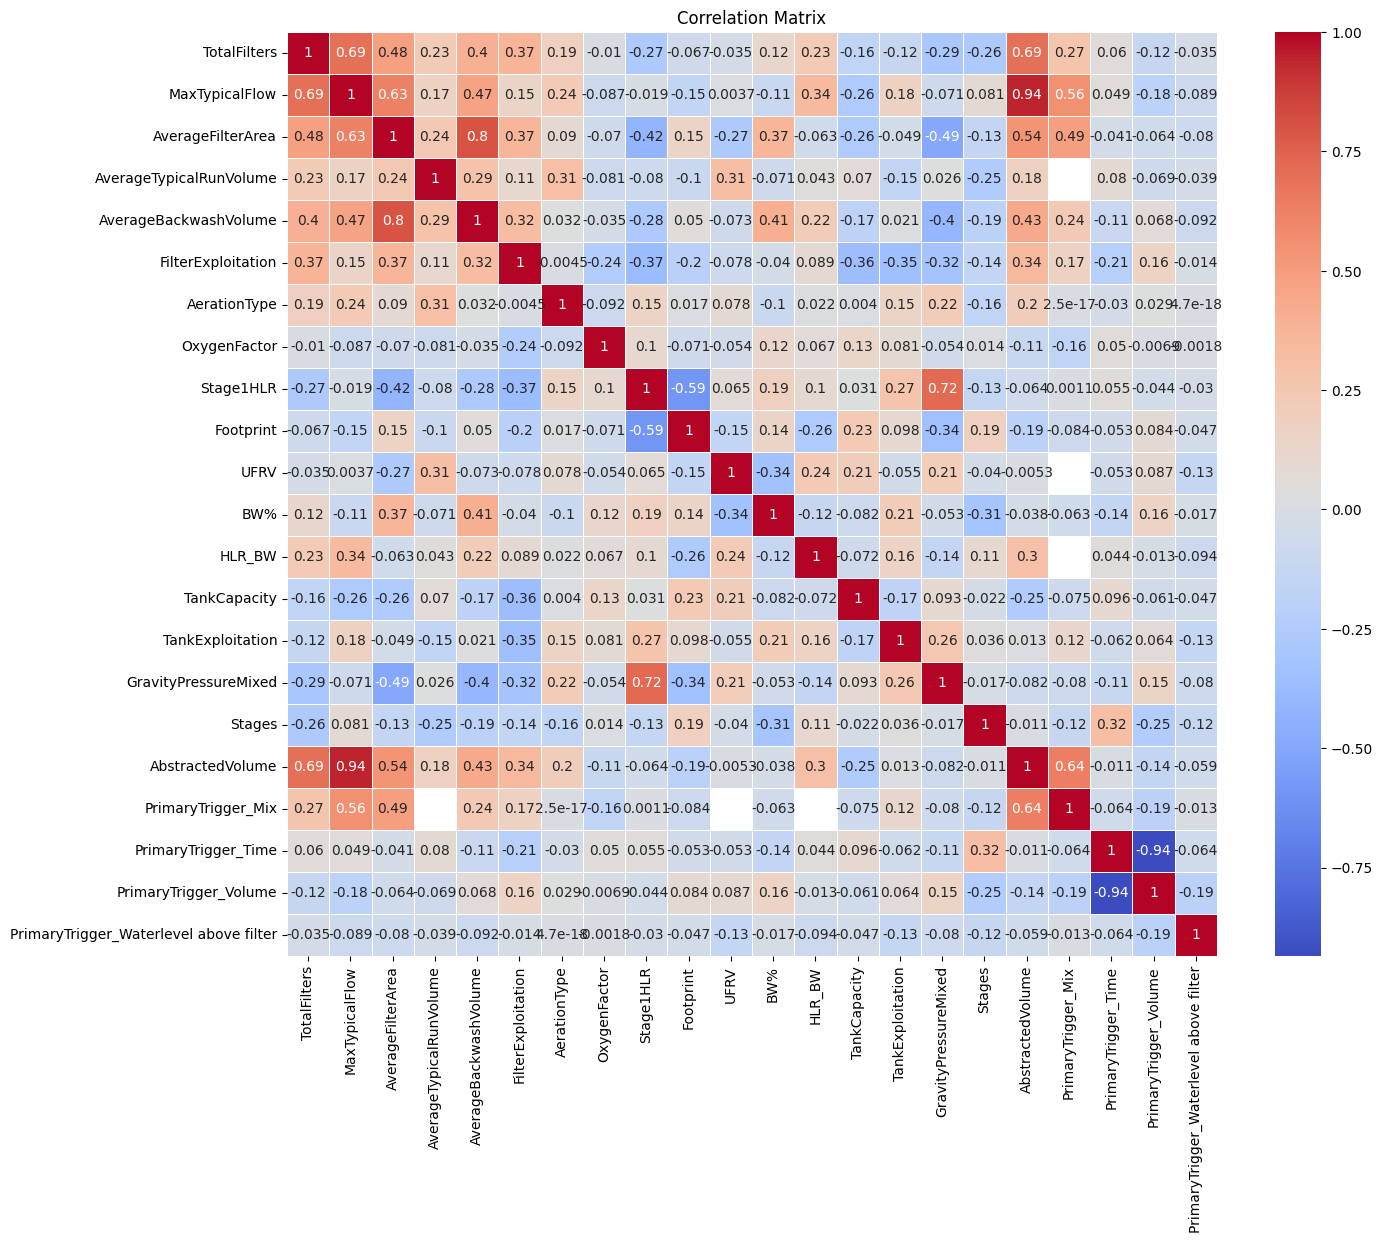

In [509]:
correlation_matrix = df.corr()

def display_correlation_matrix(correlation_matrix):
    plt.figure(figsize=(15, 12))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

display_correlation_matrix(correlation_matrix)

Base on the above matrix, the "AbstractedVolume" is in a very close correlation with "MaxTypicalFlow", meaning that they are providing us with very similar information, thus not neeting one of them.
So, the following columns are in close correlation and one of them will be removed:
- "AbstractedVolume" and "MaxTypicalFlow" = 0.94
- "AverageBackwashVolume" and "AverageFilterArea" = 0.8
- "PrimaryTrigger_Time" and "PrimaryTrigger_Volume" = -0.94

We will choose to remove the "MaxTypicalFlow", "PrimaryTrigger_Time" and "AverageFilterArea" to make it easier to work with the data and improve the fitment of the models.

In [510]:
df = df.drop(columns=["MaxTypicalFlow", "PrimaryTrigger_Time", "AverageFilterArea"])
df

,TotalFilters,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume,PrimaryTrigger_Mix,PrimaryTrigger_Volume,PrimaryTrigger_Waterlevel above filter
0,6,5200.00000,10.00,57.886530,2,1.880000,1.388889,143.341204,866.666667,0.414525,NaN,27.294778,NaN,0,2,253543,False,False,False
1,4,300.00000,28.00,63.521586,0,1.620000,11.204508,16.714412,40.743665,23.000062,30.557749,2.576075,NaN,2,0,612094,False,True,False
2,4,3800.00000,83.30,64.908486,1,2.213333,3.935020,44.693822,249.217919,2.192086,32.791831,21.825600,NaN,0,0,682318,False,True,False
3,2,1200.00000,26.00,NaN,2,2.073333,NaN,194.588021,75.000000,2.166907,NaN,12.554300,NaN,0,2,156998,False,True,False
4,2,250.00000,4.50,NaN,2,1.313333,NaN,412.300024,167.224093,1.818182,NaN,52.220566,NaN,0,2,6710,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,NaN,110.00,91.698648,2,1.546667,5.242647,24.106636,NaN,0.178441,NaN,9.176959,39.682540,0,0,11454775,True,False,False
75,20,4500.00000,57.00,89.405620,6,2.133333,6.912876,22.050800,442.097088,1.236822,51.086775,6.040393,NaN,2,2,11021800,False,True,False
76,6,2331.50137,51.57,19.331598,1,1.673333,2.824380,209.076387,158.041107,4.446077,30.367735,22.367525,45.833333,0,2,423362,False,False,False
77,12,4400.00000,134.00,NaN,2,2.200000,NaN,152.513970,93.489396,35.386015,32.053507,NaN,NaN,0,0,1521895,False,True,False


Now our correlation matrix should look much better.
Let's have a look

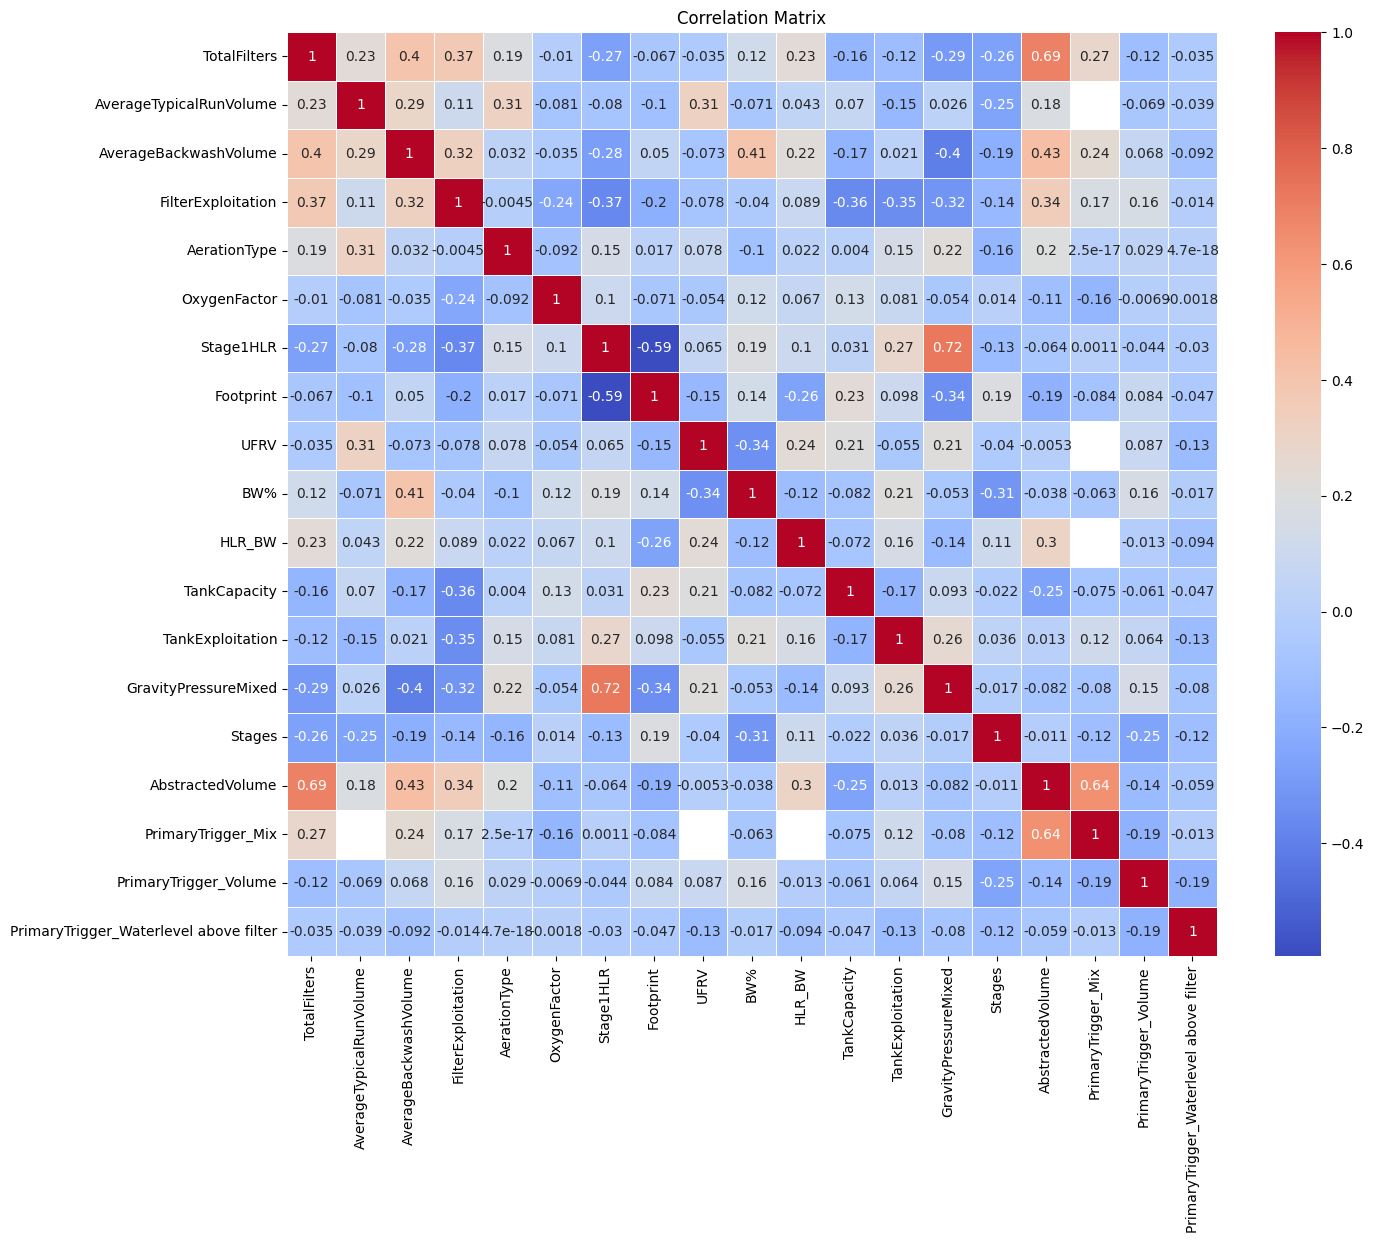

In [511]:
correlation_matrix = df.corr()
display_correlation_matrix(correlation_matrix)

In the above correlation matrix, we do not see any values greater than 0.8 or lower than -0.8.
This means that the features in our dataset are not strongly correlated with each other, which helps the model 
in several ways:
- The model will have an easier time fitting the data without the risk of redundant information.
- It will reduce the chances of overfitting, as there are no highly correlated features providing repetitive data.
- The model and our processing will be less complex, leading to better generalization on unseen data.

We now want to make sure that we don't have any outliers in the columns left. So we will check the skewness of the still present columns and transform the data according to skewness.

In [512]:
numerical_columns = [col for col in df.columns if col not in columns_to_encode]
skewness = df[numerical_columns].skew()
skewness

TotalFilters                              1.265909
AverageTypicalRunVolume                   5.079522
AverageBackwashVolume                     1.565571
FilterExploitation                        0.058248
OxygenFactor                             -0.763642
Stage1HLR                                 1.288295
Footprint                                 3.060684
UFRV                                      1.484950
BW%                                       4.425347
HLR_BW                                    0.317641
TankCapacity                              2.660706
TankExploitation                          1.361447
AbstractedVolume                          4.395703
PrimaryTrigger_Mix                        8.888194
PrimaryTrigger_Volume                    -1.080807
PrimaryTrigger_Waterlevel above filter    8.888194
dtype: float64

What to transform the data considering the skewness we have.
Highly Positive Skewed Columns (> 1):
- AverageTypicalRunVolume                   5.079522
- BW%                                       4.425347
- AbstractedVolume                          4.395703
- PrimaryTrigger_Mix                        8.888194
- PrimaryTrigger_Waterlevel above filter    8.888194

High Negative Skewed Columns (< -1):
- PrimaryTrigger_Volume                    -1.080807

Knowing this, we will use a logarithmic transformation for all the high positive skewed columns and square root for high negative ones.

In [513]:
for col in numerical_columns:
    if skewness[col] > 1:
        df[col] = np.log1p(df[col])
    elif skewness[col] < -1:
        df[col] = np.sqrt(df[col])

skewness = df[numerical_columns].skew()
skewness

TotalFilters                              0.096939
AverageTypicalRunVolume                   0.065147
AverageBackwashVolume                    -0.395406
FilterExploitation                        0.058248
OxygenFactor                             -0.763642
Stage1HLR                                 0.453014
Footprint                                 0.106143
UFRV                                     -0.298092
BW%                                       1.889804
HLR_BW                                    0.317641
TankCapacity                             -0.042326
TankExploitation                         -0.180702
AbstractedVolume                         -0.363030
PrimaryTrigger_Mix                        8.882812
PrimaryTrigger_Volume                    -1.080078
PrimaryTrigger_Waterlevel above filter    8.882812
dtype: float64

The reduction in skewness worked on some columns, but now on all of them
- PrimaryTrigger_Mix is still around 8.9
- PrimaryTrigger_Waterlevel above filter is also 8.9
- BW% is also 1.889

In [514]:
for column in ["PrimaryTrigger_Volume", 'PrimaryTrigger_Mix', 'PrimaryTrigger_Waterlevel above filter', "BW%"]:
    df[column] = df[column].clip(lower=df[column].quantile(0.01), upper=df[column].quantile(0.90))

skewness = df[numerical_columns].skew()
skewness

TotalFilters                              0.096939
AverageTypicalRunVolume                   0.065147
AverageBackwashVolume                    -0.395406
FilterExploitation                        0.058248
OxygenFactor                             -0.763642
Stage1HLR                                 0.453014
Footprint                                 0.106143
UFRV                                     -0.298092
BW%                                       0.077283
HLR_BW                                    0.317641
TankCapacity                             -0.042326
TankExploitation                         -0.180702
AbstractedVolume                         -0.363030
PrimaryTrigger_Mix                        0.000000
PrimaryTrigger_Volume                    -1.080078
PrimaryTrigger_Waterlevel above filter    0.000000
dtype: float64

That looks much better, the outliers have been remove from our problematic columns :)

The fact that our dataset is 80 rows presents some challenges:
The consequences we have are:
- Overfitting: Small datasets lead to memorization of data instead of generalization.
- Model Limitations: Complex models can't perform well; simpler models are needed.
- High Variance: Performance is highly sensitive to data variability, affecting consisency.
- Limited Diversity: The data might not represent all possible scenarios, leading to poor generalization.

What we could do the following as potential solutions:
- Simplify Models: We could use linear regression or decision trees to avoid overfitting.
- Cross-Validation: We can apply k-fold or leave-one-out cross-validation to make the best use of limited data.
- Regularization: We can apply L1 or L2 regularization to prevent complexity.
- Leverage Domain Knowledge: We can talk with professionals from Water Treatment Plants and we can tune the models better, despite the amount of data we have.